In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from util import combine_data, evaluate

In [2]:
combine_data()

In [3]:
df = pd.read_parquet("pp_gas_emission.parquet")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36725 entries, 0 to 36724
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36725 non-null  float64
 1   AP      36725 non-null  float64
 2   AH      36725 non-null  float64
 3   AFDP    36725 non-null  float64
 4   GTEP    36725 non-null  float64
 5   TIT     36725 non-null  float64
 6   TAT     36725 non-null  float64
 7   TEY     36725 non-null  float64
 8   CDP     36725 non-null  float64
 9   CO      36725 non-null  float64
 10  NOX     36725 non-null  float64
 11  year    36725 non-null  int64  
 12  target  36725 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 3.9 MB


AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   

        CO     NOX  year  target  
0  0.32663  81.952  2011  134.67  
1  0.44784  82.377  2011  135.10  
2  0.45144  83.776  2011  135.03  
3  0.23107  82.505  2011  134.67  
4  0.26747  82.028  2011  134.67

In [4]:
profile = ProfileReport(df)
profile.to_file("data_summary.html")

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/ajaypethani/anaconda3/lib/python3.7/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

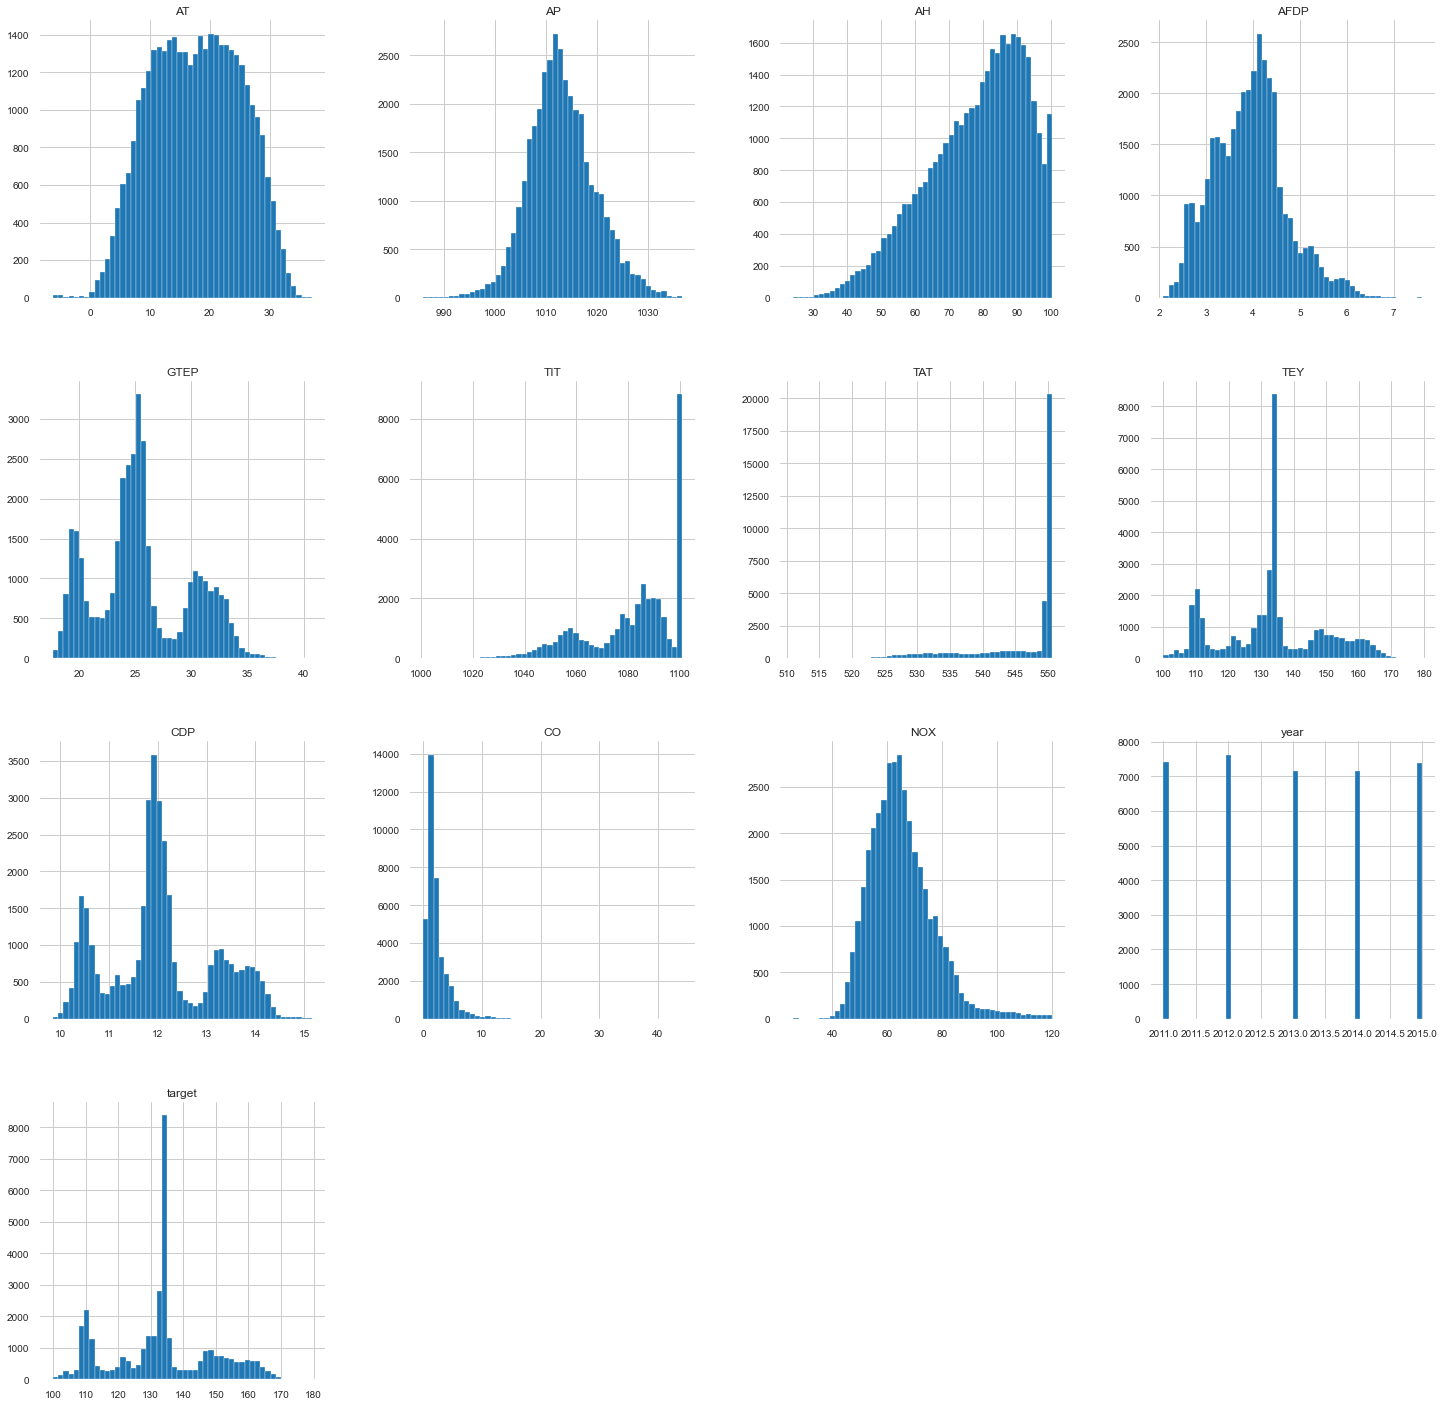

In [5]:
df.hist(figsize=(25, 25), bins=50);

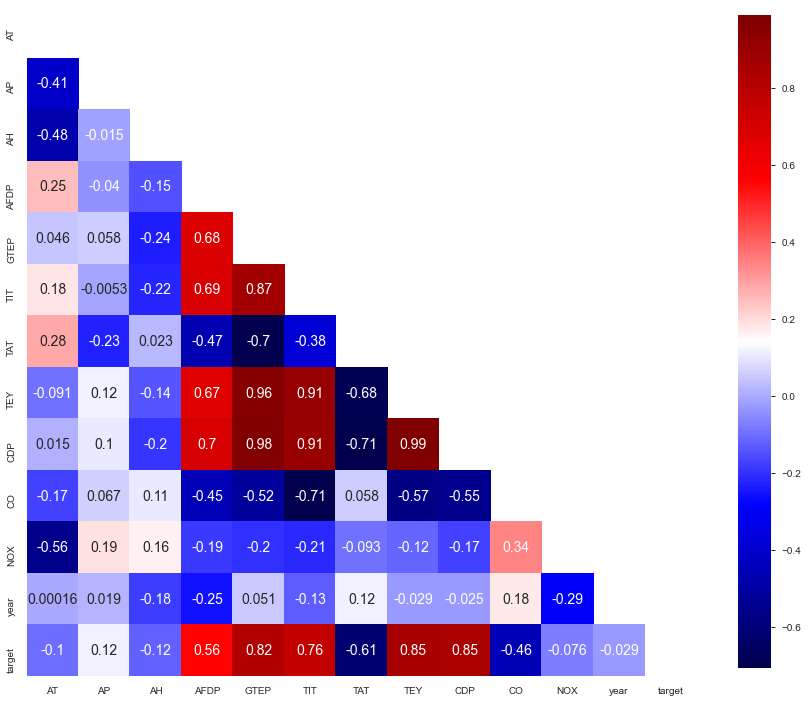

In [6]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 15))
sns.heatmap(corr, square=True, mask=mask, cmap="seismic",
            annot=True, cbar_kws={"shrink": 0.8}, annot_kws={"size": 14});

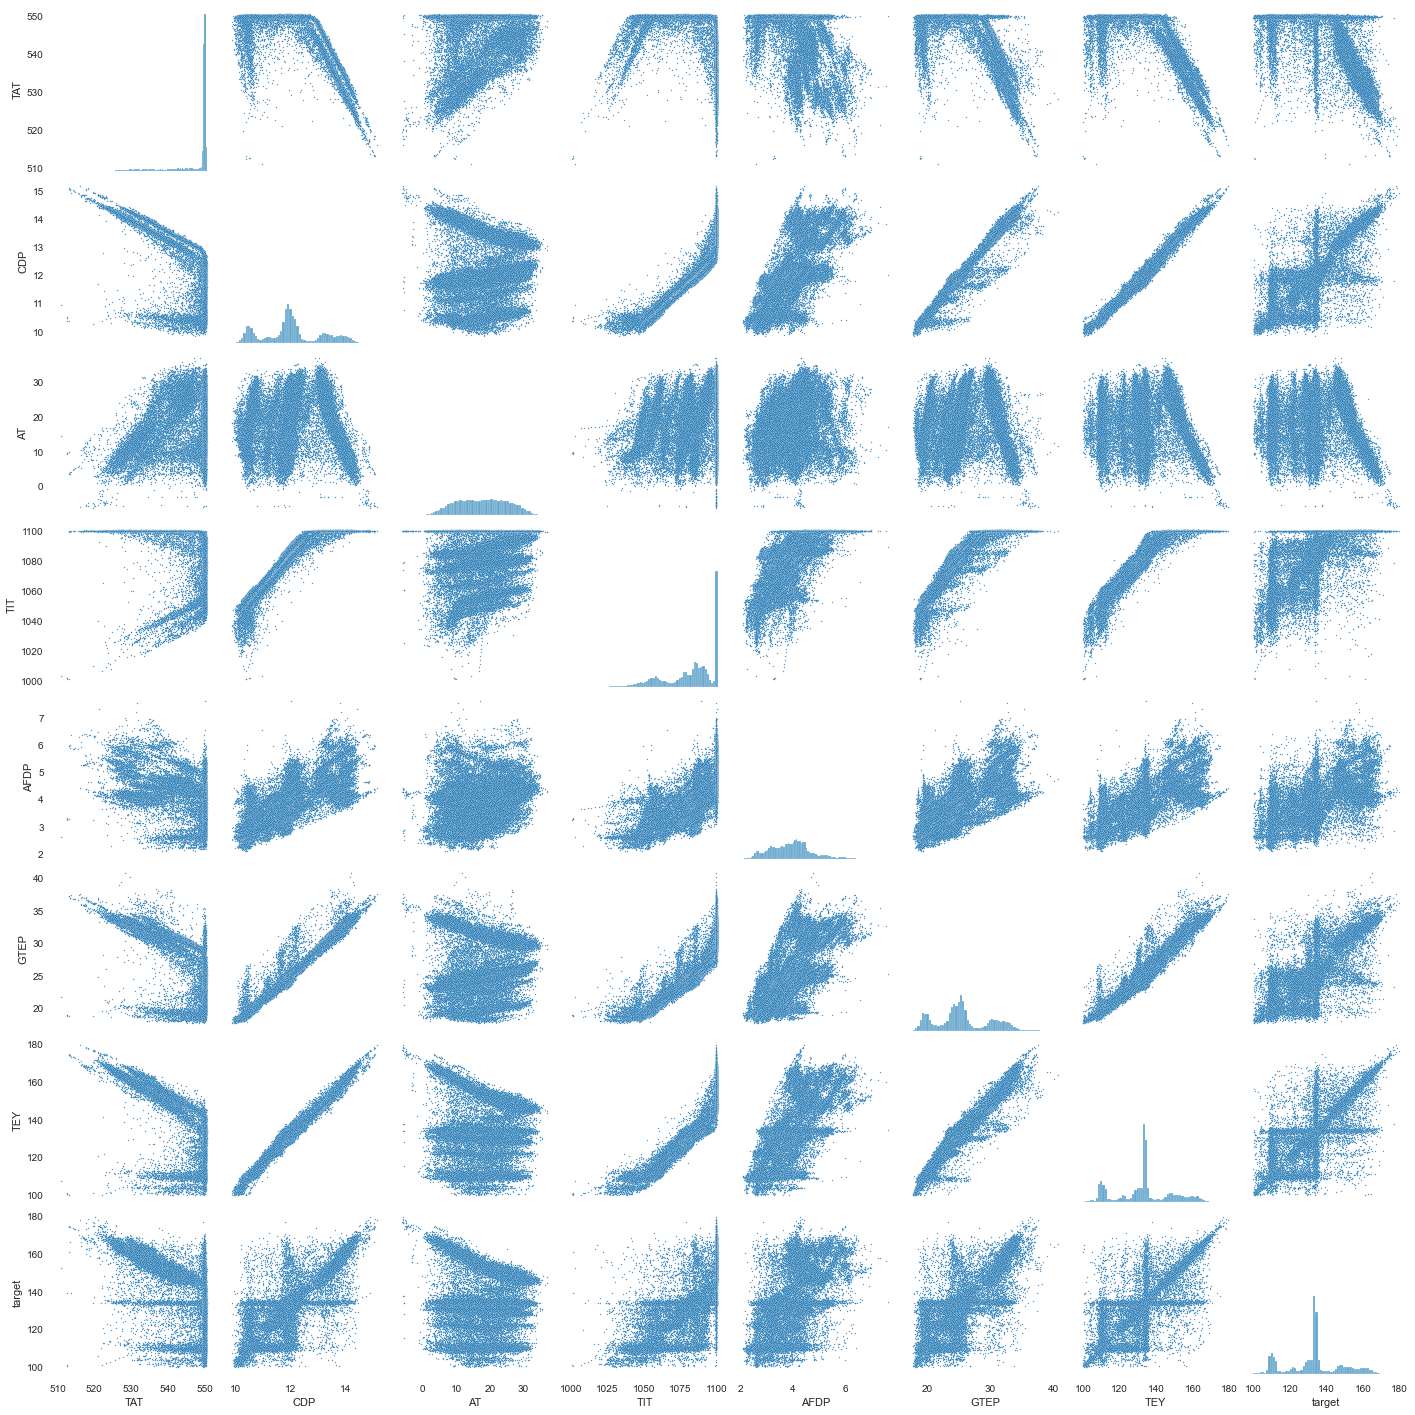

In [7]:
sns.pairplot(df[['TAT', 'CDP', 'AT', 'TIT', 'AFDP', 'GTEP', 'TEY','target']], 
             plot_kws={"alpha": 0.75, "s": 2})

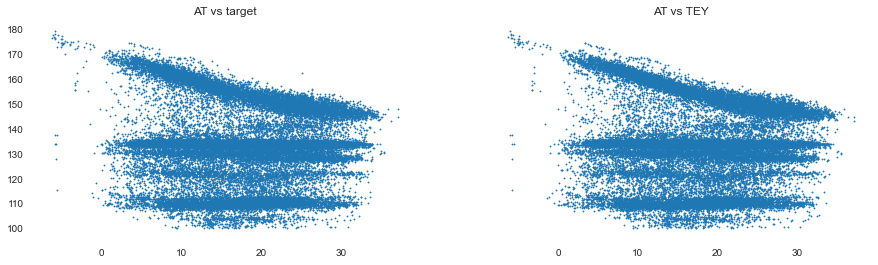

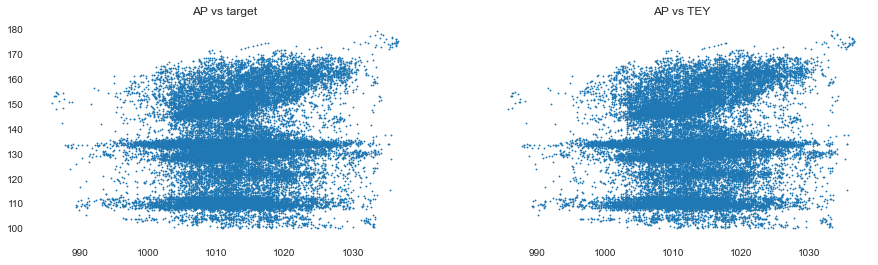

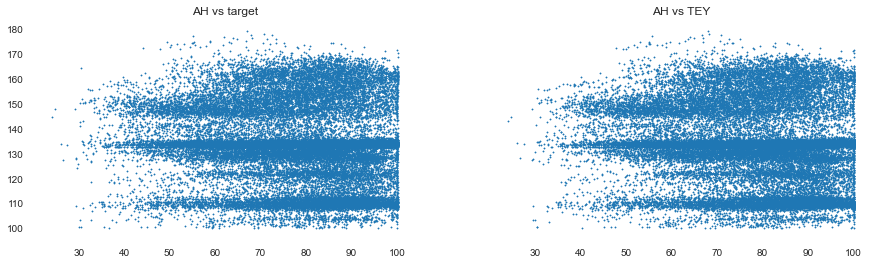

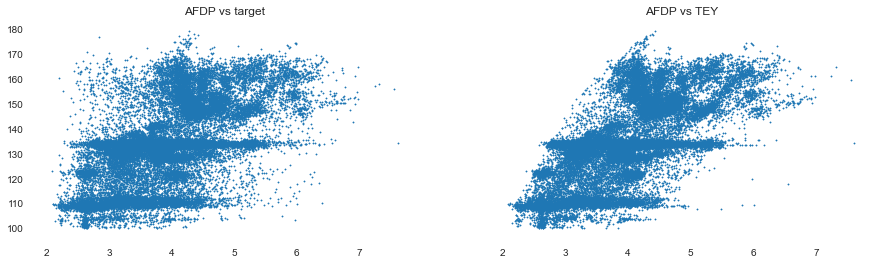

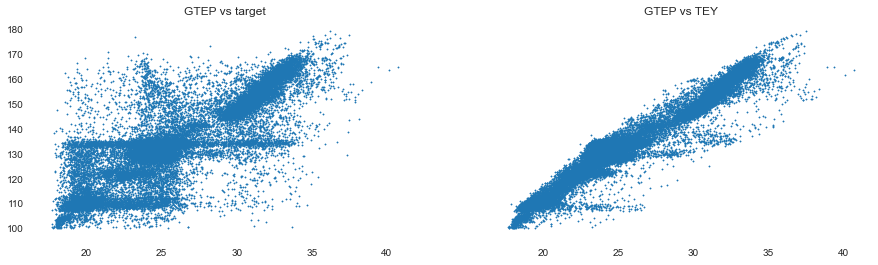

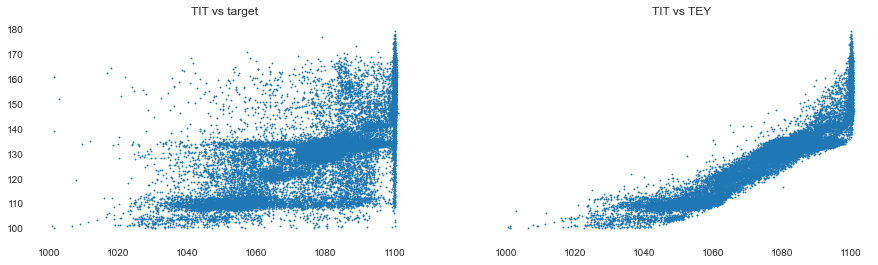

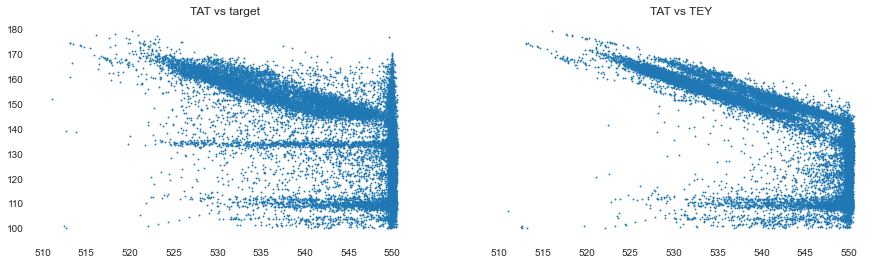

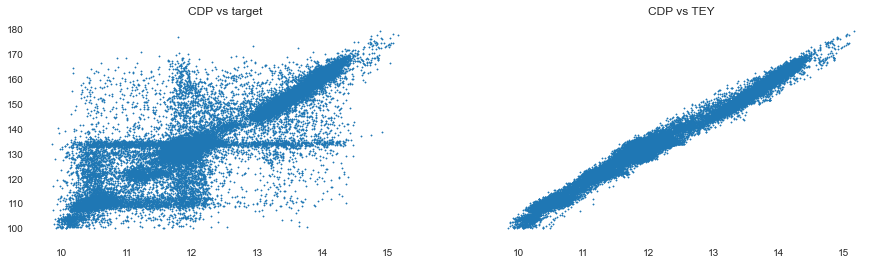

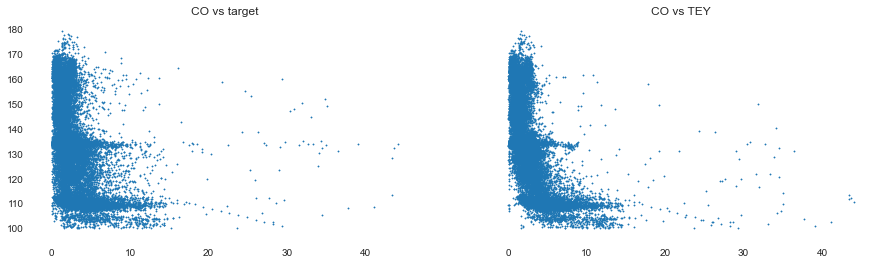

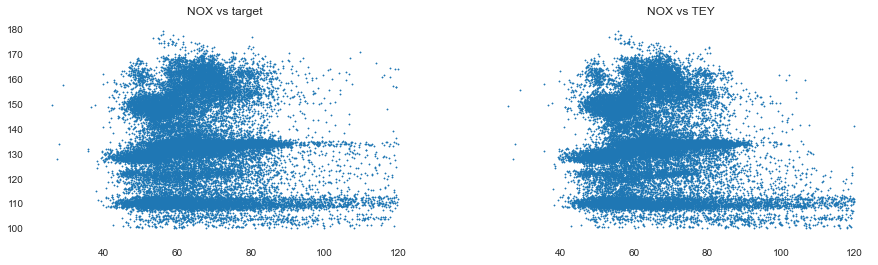

In [8]:
for col in df.columns:
    if col in {"target", "year", "TEY"}:
        continue
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4), sharey=True)
    ax1.scatter(df[col], df["target"], s=2)
    ax2.scatter(df[col], df["TEY"], s=2)
    ax1.set_title(f"{col} vs target")
    ax2.set_title(f"{col} vs TEY")

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

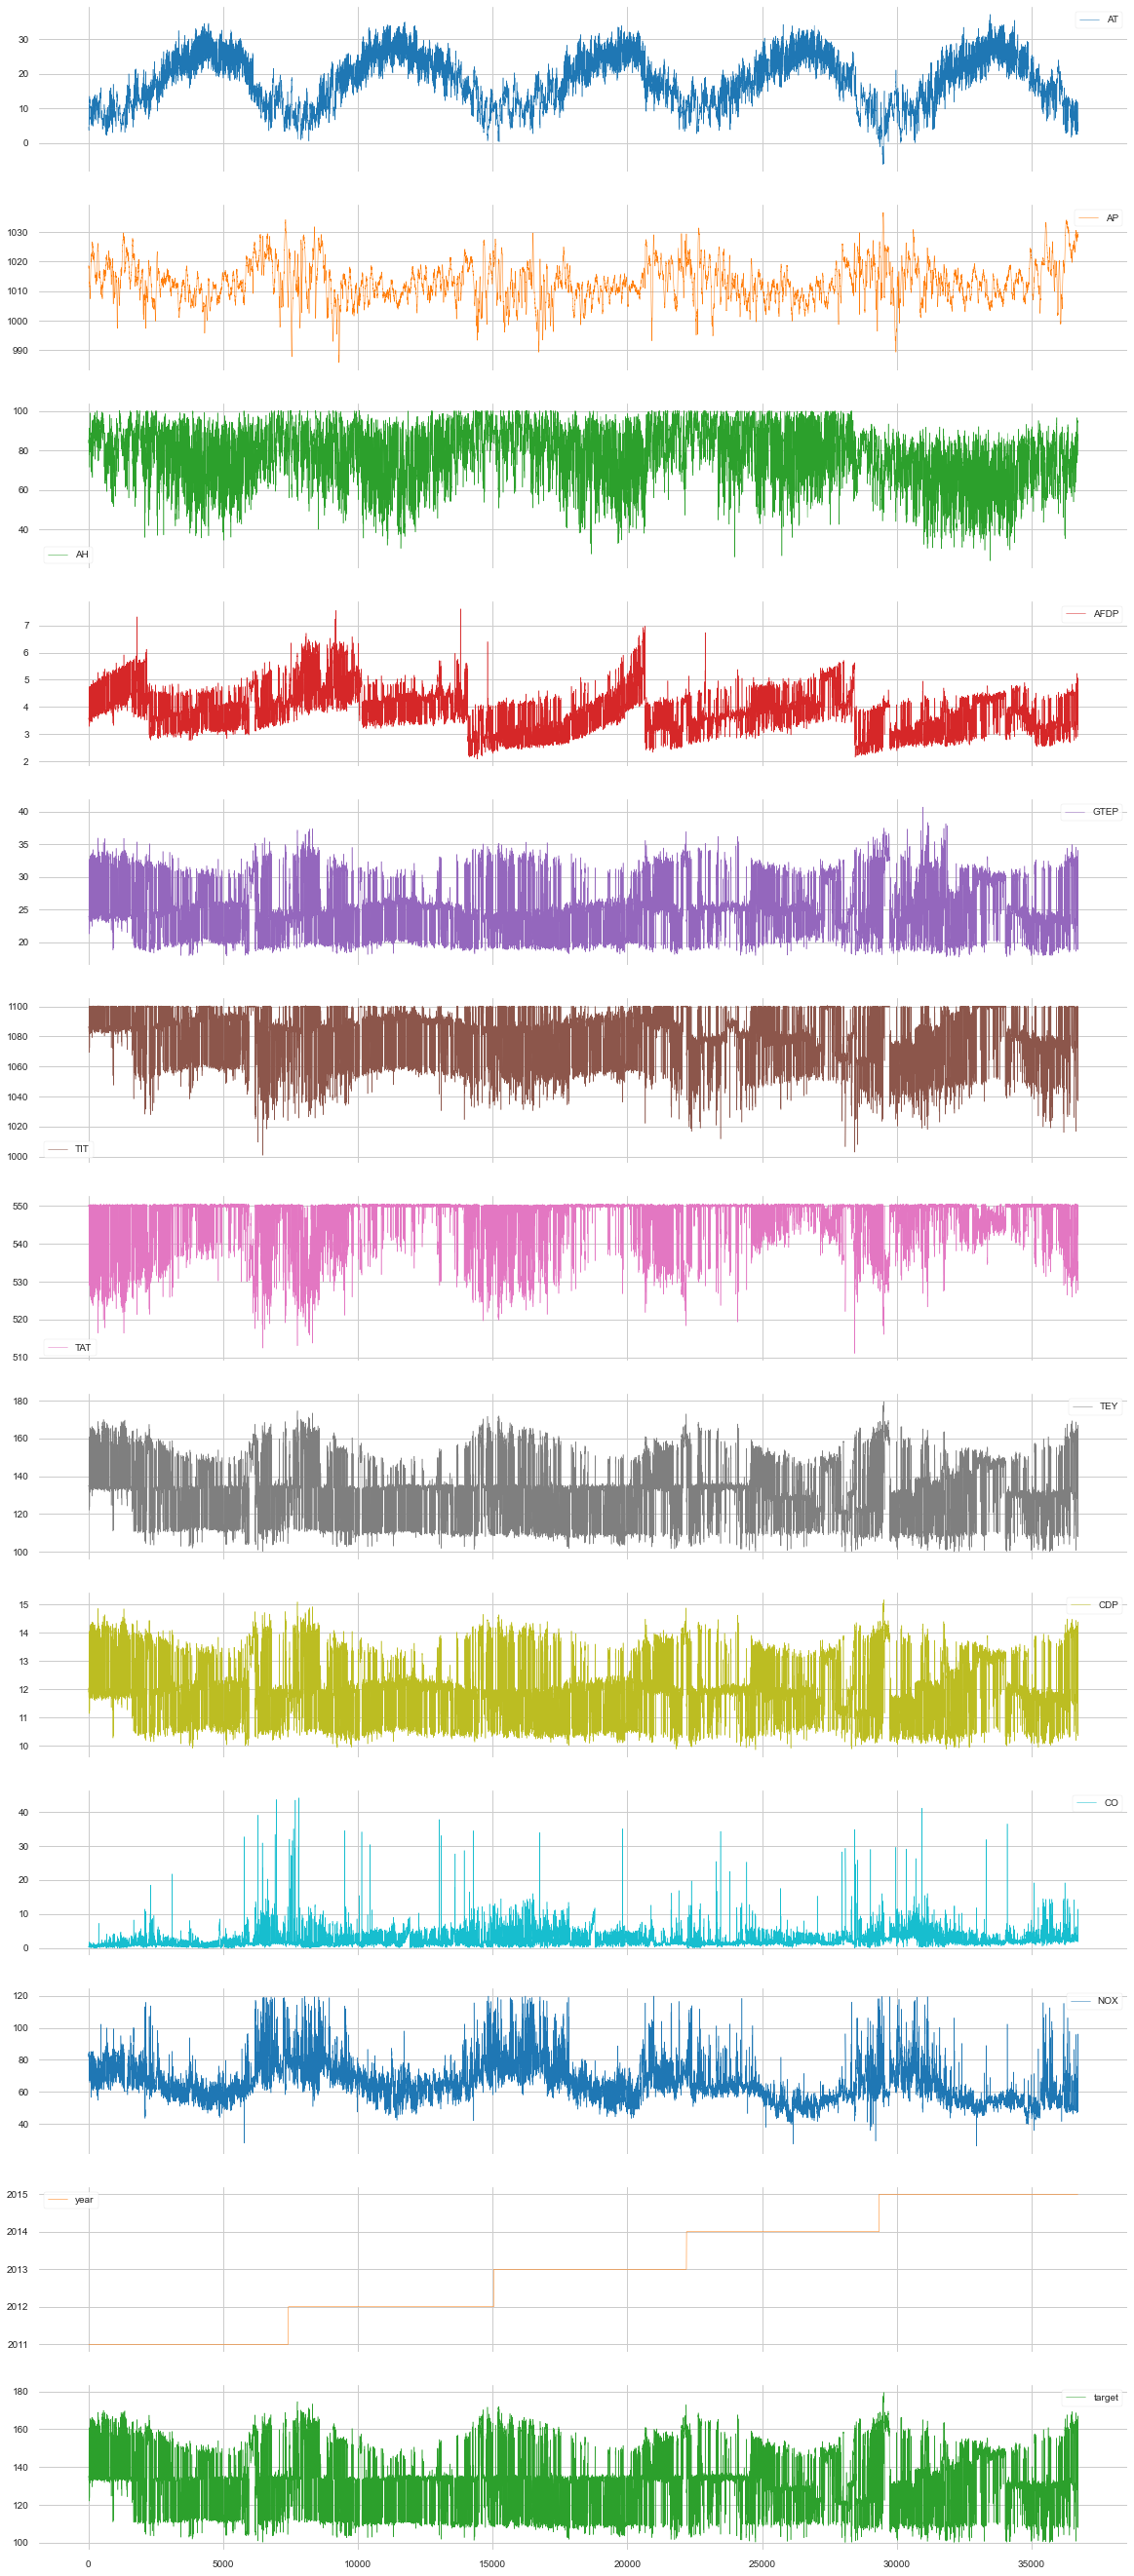

In [9]:
df.plot.line(subplots=True, figsize=(20, 48), linewidth=0.5, grid=True)

# Baseline models

In [10]:
X_train = df[df["year"] <= 2013].drop(columns=["year", "target"]).to_numpy()
y_train = df[df["year"] <= 2013]["target"].to_numpy()
X_test = df[df["year"] > 2013].drop(columns=["year", "target"]).to_numpy()
y_test = df[df["year"] > 2013]["target"].to_numpy()

MAE = 5.280004320273914
MSE = 70.79463638440326
RMSE = 8.413954859898125
MAPE = 0.04227026342230348
R^2 = 0.6844277545981035
Explained Variance Score = 0.7145408281336165

Residuals summary stats
╒═══════╤═══════════╕
│ count │     14534 │
├───────┼───────────┤
│ mean  │   2.59913 │
├───────┼───────────┤
│ std   │   8.00272 │
├───────┼───────────┤
│ min   │  -52.6081 │
├───────┼───────────┤
│ 25%   │ -0.388853 │
├───────┼───────────┤
│ 50%   │   2.09268 │
├───────┼───────────┤
│ 75%   │   4.88528 │
├───────┼───────────┤
│ max   │   57.0039 │
╘═══════╧═══════════╛

Deviation from mean of residuals
╒════════════╤══════════╤════════════╕
│ Interval   │   Actual │   Expected │
╞════════════╪══════════╪════════════╡
│ μ ± σ      │  83.5214 │       68.2 │
├────────────┼──────────┼────────────┤
│ μ ± 2σ     │  92.9407 │       95.4 │
├────────────┼──────────┼────────────┤
│ μ ± 3σ     │  97.4474 │       99.7 │
╘════════════╧══════════╧════════════╛

Jarque-Bera Test on Residuals
╒═════════════

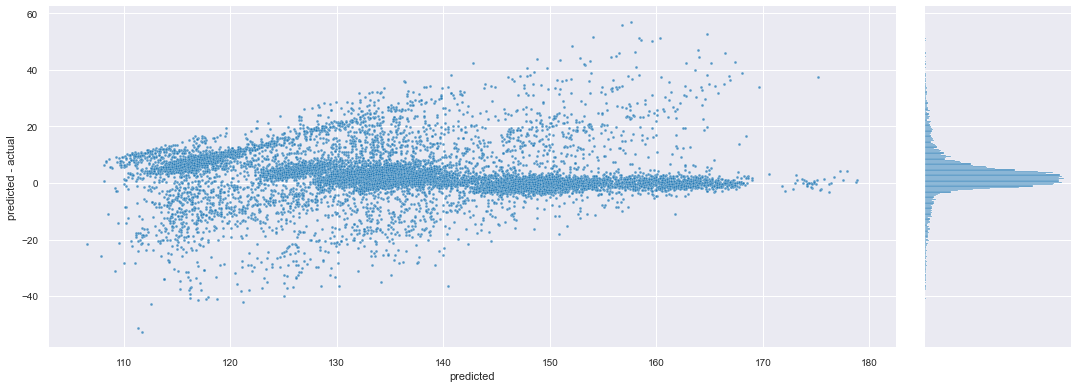

<Figure size 720x576 with 0 Axes>

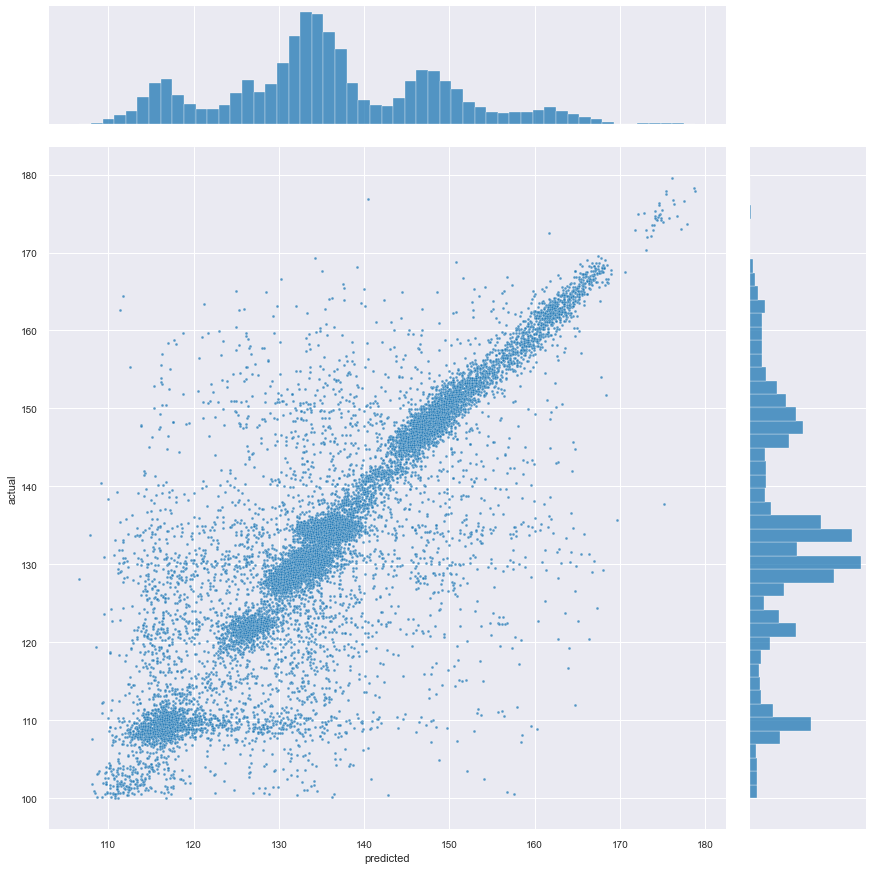

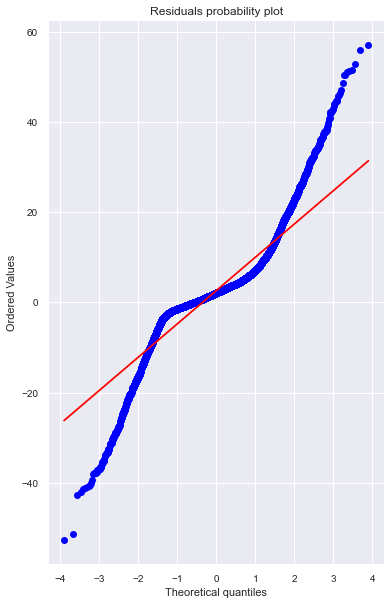

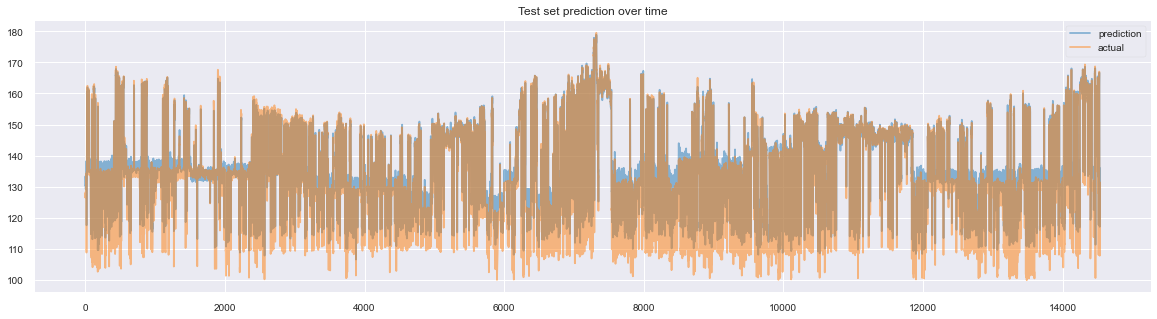

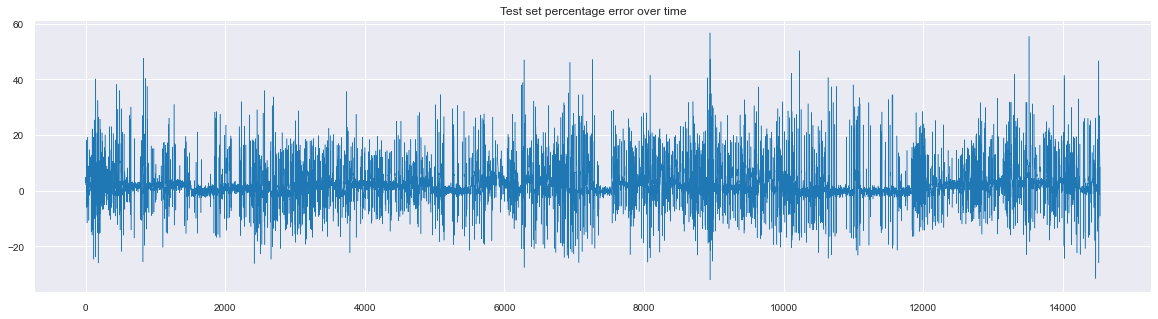

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)

MAE = 4.991704442079828
MSE = 65.20804814540463
RMSE = 8.07515003856923
MAPE = 0.038704437998822575
R^2 = 0.7093303783667173
Explained Variance Score = 0.7099622393146451

Residuals summary stats
╒═══════╤═══════════╕
│ count │     14534 │
├───────┼───────────┤
│ mean  │ -0.376497 │
├───────┼───────────┤
│ std   │   8.06665 │
├───────┼───────────┤
│ min   │   -53.627 │
├───────┼───────────┤
│ 25%   │   -3.1419 │
├───────┼───────────┤
│ 50%   │  -1.13956 │
├───────┼───────────┤
│ 75%   │   2.26368 │
├───────┼───────────┤
│ max   │   54.0529 │
╘═══════╧═══════════╛

Deviation from mean of residuals
╒════════════╤══════════╤════════════╕
│ Interval   │   Actual │   Expected │
╞════════════╪══════════╪════════════╡
│ μ ± σ      │  83.3769 │       68.2 │
├────────────┼──────────┼────────────┤
│ μ ± 2σ     │  93.037  │       95.4 │
├────────────┼──────────┼────────────┤
│ μ ± 3σ     │  97.4542 │       99.7 │
╘════════════╧══════════╧════════════╛

Jarque-Bera Test on Residuals
╒═════════════

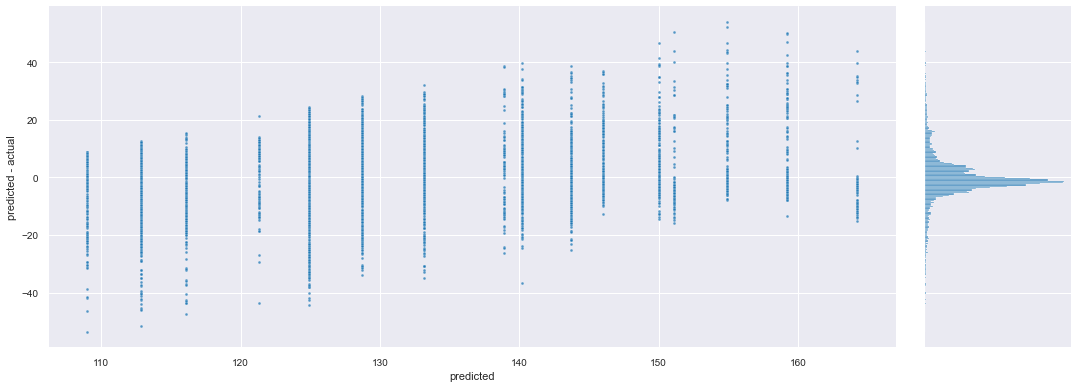

<Figure size 720x576 with 0 Axes>

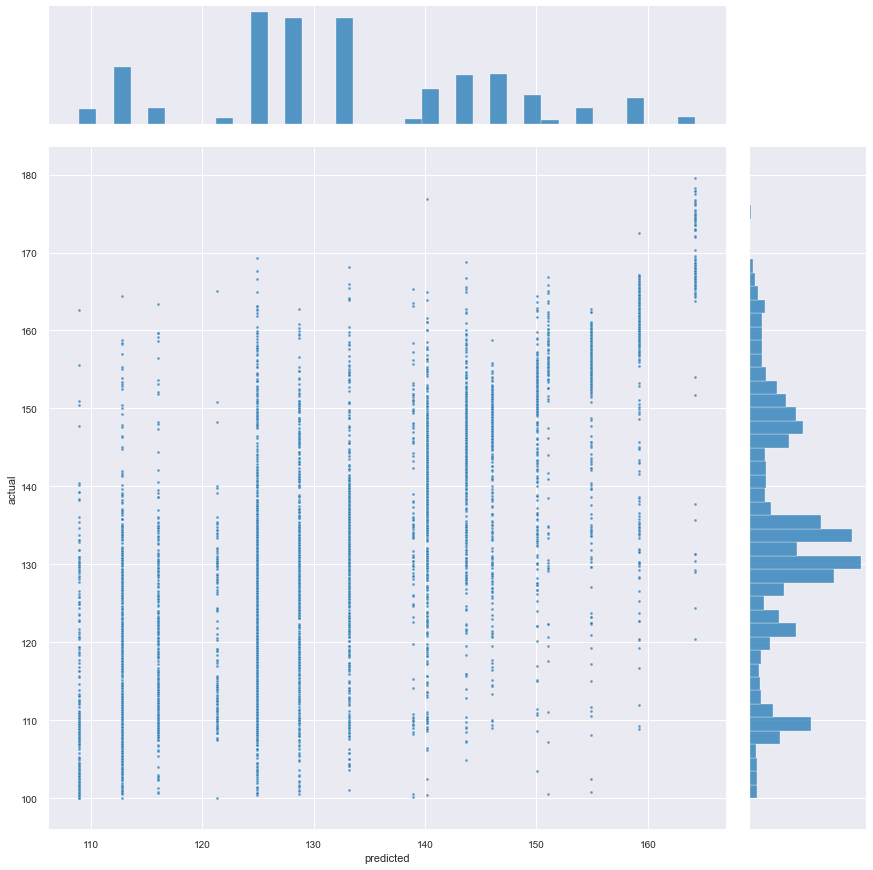

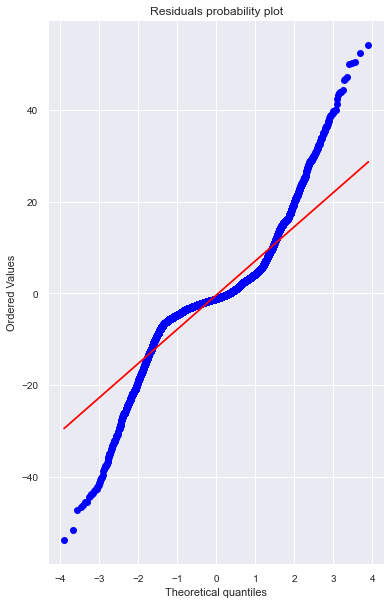

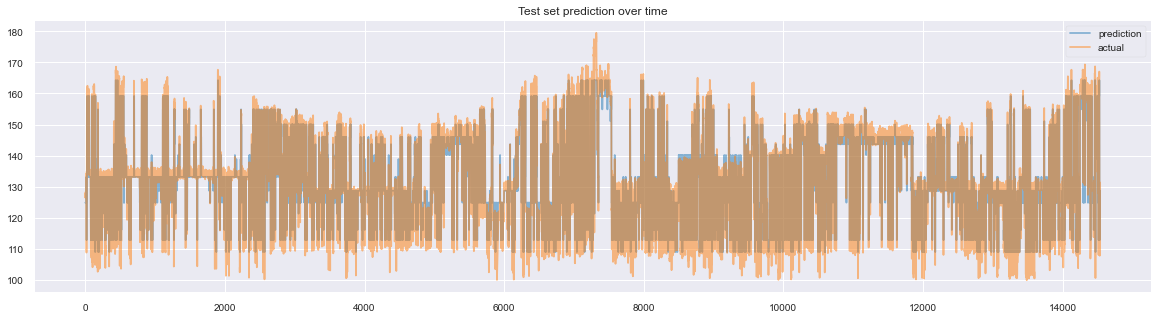

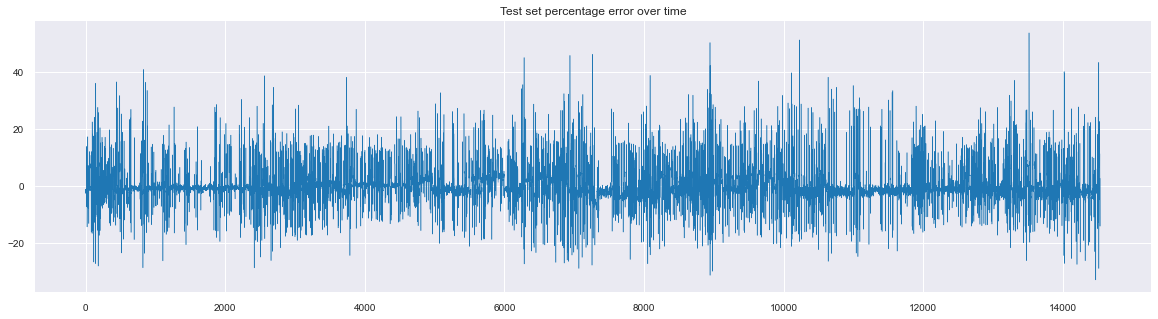

In [12]:
tree = DecisionTreeRegressor(random_state=0, max_depth=4, min_samples_split=10)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
evaluate(y_test, y_pred)

In [13]:
feat_importance = dict(zip(df.columns[:-2].tolist(), tree.feature_importances_.tolist()))
pd.Series(feat_importance).sort_values(ascending=False)

TEY     0.728590
CDP     0.267835
TAT     0.002075
GTEP    0.000801
TIT     0.000700
AT      0.000000
AP      0.000000
AH      0.000000
AFDP    0.000000
CO      0.000000
NOX     0.000000
dtype: float64

MAE = 5.145210429771783
MSE = 64.75153298023432
RMSE = 8.046833723908698
MAPE = 0.03991451209515505
R^2 = 0.7113653279489227
Explained Variance Score = 0.7129051579760675

Residuals summary stats
╒═══════╤═══════════╕
│ count │     14534 │
├───────┼───────────┤
│ mean  │ -0.587743 │
├───────┼───────────┤
│ std   │   8.02562 │
├───────┼───────────┤
│ min   │  -50.0595 │
├───────┼───────────┤
│ 25%   │  -3.56296 │
├───────┼───────────┤
│ 50%   │  -1.58456 │
├───────┼───────────┤
│ 75%   │   2.35704 │
├───────┼───────────┤
│ max   │   52.4468 │
╘═══════╧═══════════╛

Deviation from mean of residuals
╒════════════╤══════════╤════════════╕
│ Interval   │   Actual │   Expected │
╞════════════╪══════════╪════════════╡
│ μ ± σ      │  83.1017 │       68.2 │
├────────────┼──────────┼────────────┤
│ μ ± 2σ     │  93.0714 │       95.4 │
├────────────┼──────────┼────────────┤
│ μ ± 3σ     │  97.4474 │       99.7 │
╘════════════╧══════════╧════════════╛

Jarque-Bera Test on Residuals
╒═════════════

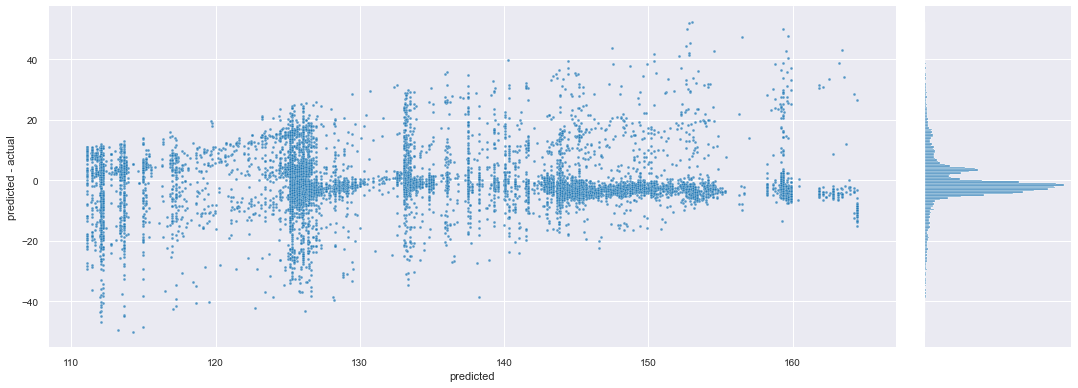

<Figure size 720x576 with 0 Axes>

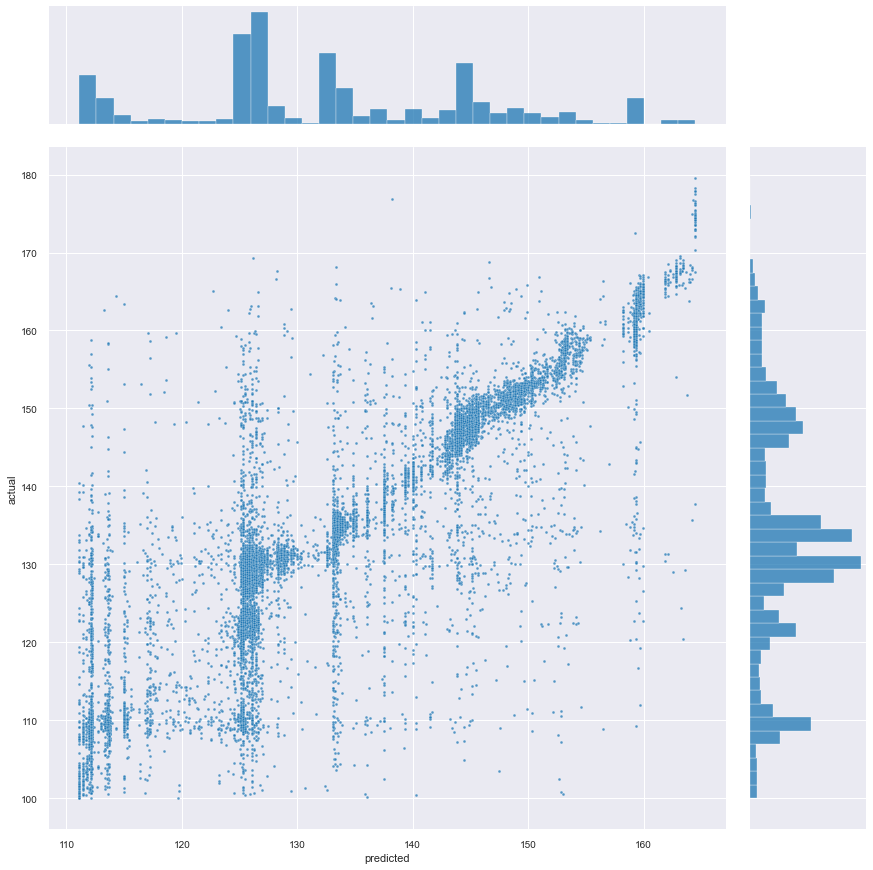

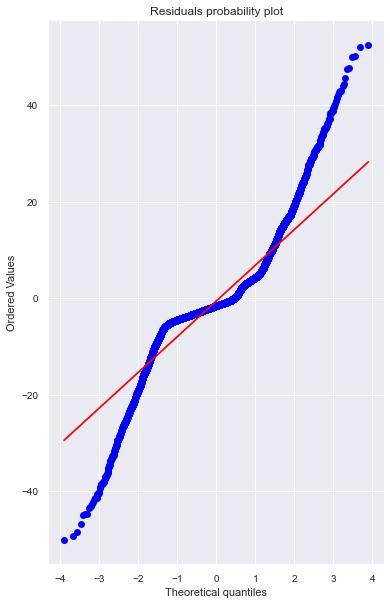

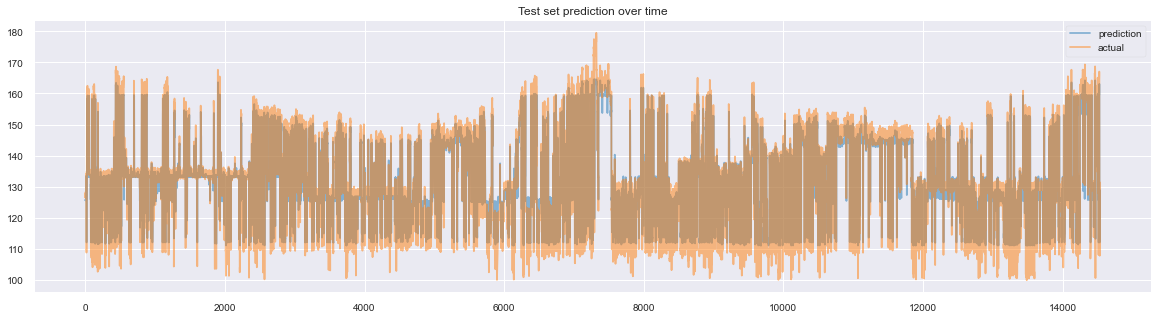

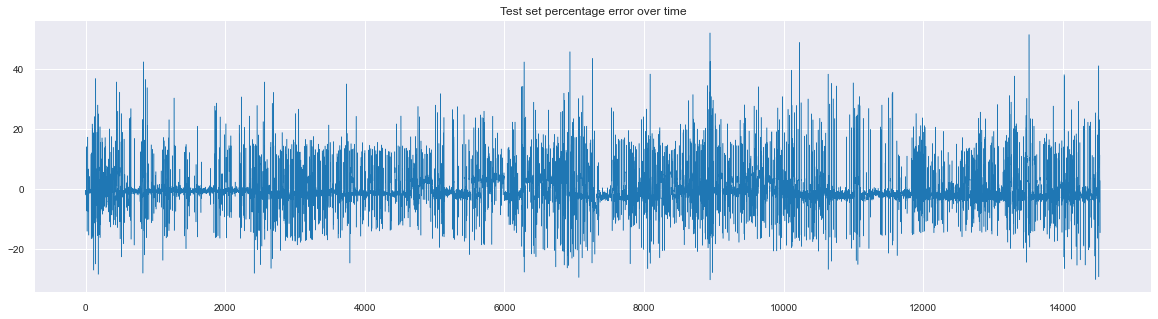

In [14]:
regr = RandomForestRegressor(n_estimators=25, random_state=0, max_depth=4, min_samples_split=10, n_jobs=-1)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
evaluate(y_test, y_pred)

In [15]:
os.makedirs("modelling_data", exist_ok=True)
df[df["year"] <= 2012].drop(columns=["year", "target"]).to_parquet("./modelling_data/X_train.parquet")
df[df["year"] <= 2012]["target"].to_frame().to_parquet("./modelling_data/y_train.parquet")
df[df["year"] == 2013].drop(columns=["year", "target"]).to_parquet("./modelling_data/X_validation.parquet")
df[df["year"] == 2013]["target"].to_frame().to_parquet("./modelling_data/y_validation.parquet")
df[df["year"] >= 2014].drop(columns=["year", "target"]).to_parquet("./modelling_data/X_test.parquet")
df[df["year"] >= 2014]["target"].to_frame().to_parquet("./modelling_data/y_test.parquet")

In [16]:
df.groupby("year")["target"].agg(lambda s: 100*(s.count()/len(df)))

year
2011    20.179714
2012    20.770592
2013    19.474472
2014    19.471749
2015    20.103472
Name: target, dtype: float64